# 📊 Dataset Information

**Note:** The dataset for this project is **not included in this repository** to keep the repository lightweight.  

You can download the dataset from **Kaggle** using the link below:  

[Download The European Housing Prices Dataset](https://www.kaggle.com/datasets/ibrahimshahrukh/european-housing-price-index-dataset/data)  

Please make sure to place the downloaded CSV file in the same directory as this notebook before running any code.

# Importing

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

/kaggle/input/european-housing-price-index-dataset/european_housing_prices_clean.csv


## Import CSV And convert to DataFrame

In [2]:
df = pd.read_csv('european_housing_prices_clean.csv')

# Preprocessing

## Frist five row

In [3]:
df.head()

,country,country_type,eu_member,eurozone_member,year,quarter_num,quarter,price_index,quarterly_change_pct,yearly_change_pct,price_change_since_2015_pct,data_quality
0,Austria,Individual,Yes,Yes,2022,4,2022-Q4,166.32,-4.2,5.7,66.32,Complete
1,Austria,Individual,Yes,Yes,2023,1,2023-Q1,164.35,-1.2,-0.2,64.35,Complete
2,Austria,Individual,Yes,Yes,2023,2,2023-Q2,164.68,0.2,-2.8,64.68,Complete
3,Austria,Individual,Yes,Yes,2023,3,2023-Q3,164.29,-0.2,-5.4,64.29,Complete
4,Austria,Individual,Yes,Yes,2023,4,2023-Q4,161.40,-1.8,-3.0,61.40,Complete


## last Five row

In [4]:
df.tail()

,country,country_type,eu_member,eurozone_member,year,quarter_num,quarter,price_index,quarterly_change_pct,yearly_change_pct,price_change_since_2015_pct,data_quality
412,Türkiye,Individual,No,No,2023,4,2023-Q4,1466.37,10.6,87.3,1366.37,Complete
413,Türkiye,Individual,No,No,2024,1,2024-Q1,1569.31,7.0,63.3,1469.31,Complete
414,Türkiye,Individual,No,No,2024,2,2024-Q2,1664.83,6.1,49.7,1564.83,Complete
415,Türkiye,Individual,No,No,2024,3,2024-Q3,1767.04,6.1,33.3,1667.04,Complete
416,Türkiye,Individual,No,No,2024,4,2024-Q4,1884.94,6.7,28.5,1784.94,Complete


## Shape of our dataset

In [5]:
df.shape

(417, 12)

## List out all columns

In [6]:
df.columns

Index(['country', 'country_type', 'eu_member', 'eurozone_member', 'year',
       'quarter_num', 'quarter', 'price_index', 'quarterly_change_pct',
       'yearly_change_pct', 'price_change_since_2015_pct', 'data_quality'],
      dtype='object')

## Datatype of each columns

In [7]:
df.dtypes

country                         object
country_type                    object
eu_member                       object
eurozone_member                 object
year                             int64
quarter_num                      int64
quarter                         object
price_index                    float64
quarterly_change_pct           float64
yearly_change_pct              float64
price_change_since_2015_pct    float64
data_quality                    object
dtype: object

## Information of all Columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   country                      417 non-null    object 
 1   country_type                 417 non-null    object 
 2   eu_member                    357 non-null    object 
 3   eurozone_member              357 non-null    object 
 4   year                         417 non-null    int64  
 5   quarter_num                  417 non-null    int64  
 6   quarter                      417 non-null    object 
 7   price_index                  405 non-null    float64
 8   quarterly_change_pct         417 non-null    float64
 9   yearly_change_pct            417 non-null    float64
 10  price_change_since_2015_pct  405 non-null    float64
 11  data_quality                 417 non-null    object 
dtypes: float64(4), int64(2), object(6)
memory usage: 39.2+ KB


## Check Null Value

In [9]:
df.isnull().sum()

country                         0
country_type                    0
eu_member                      60
eurozone_member                60
year                            0
quarter_num                     0
quarter                         0
price_index                    12
quarterly_change_pct            0
yearly_change_pct               0
price_change_since_2015_pct    12
data_quality                    0
dtype: int64

## Handle Null Value

In [10]:
numeric_cols = df.select_dtypes(include=["int64","float64"]).columns
categorical_cols = df.select_dtypes(include=["object"]).columns
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

## Check Dupicate Value

In [11]:
df.duplicated().sum()

np.int64(0)

## Summary

In [12]:
df.describe()

,year,quarter_num,price_index,quarterly_change_pct,yearly_change_pct,price_change_since_2015_pct
count,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000
mean,2023.741007,2.503597,200.217314,1.276499,6.317506,100.217314
std,0.922513,1.120444,189.666760,2.698651,14.530613,189.666760
min,2022.000000,1.000000,98.280000,-6.600000,-14.500000,-1.720000
25%,2023.000000,2.000000,146.390000,-0.100000,1.100000,46.390000
50%,2024.000000,3.000000,164.250000,1.200000,4.700000,64.250000
75%,2024.000000,4.000000,202.190000,2.400000,8.400000,102.190000
max,2025.000000,4.000000,1884.940000,22.700000,170.500000,1784.940000


# EDA

In [13]:
def show_fig():
    plt.tight_layout()
    plt.show()

plot_no = 1

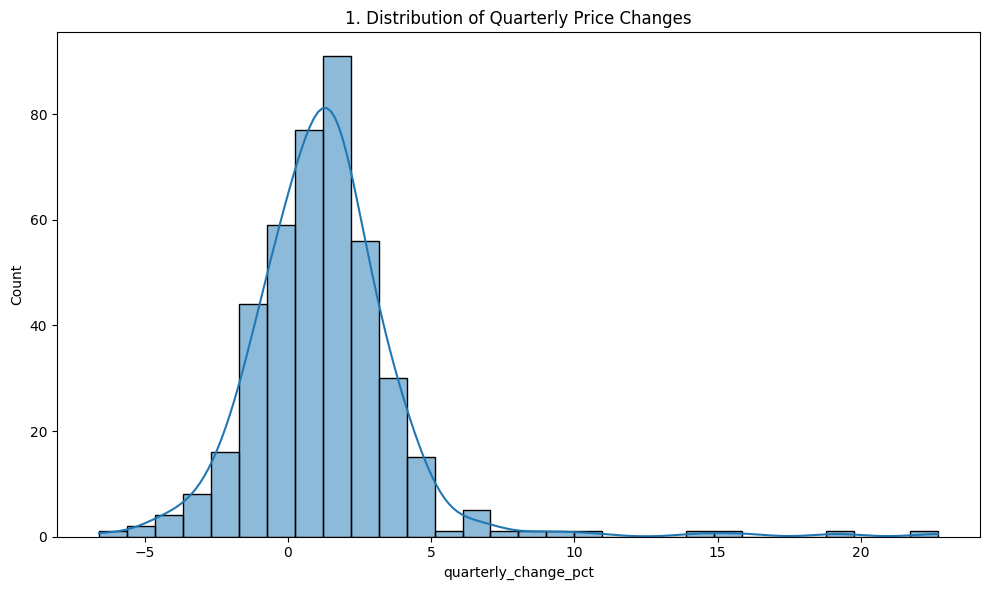

In [14]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df["quarterly_change_pct"], bins=30, kde=True)
plt.title(f'{plot_no}. Distribution of Quarterly Price Changes')
show_fig()
plot_no += 1


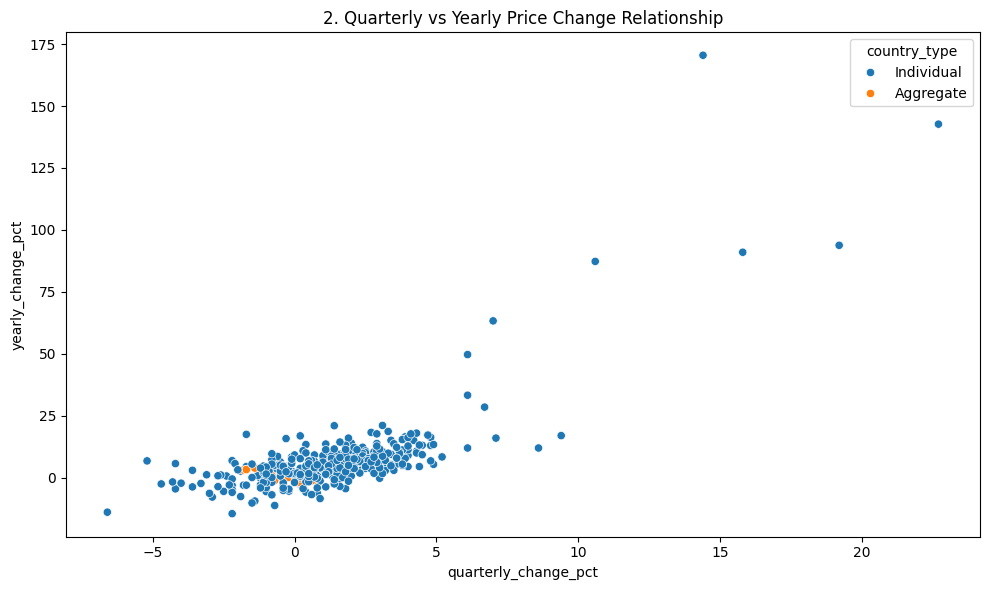

In [15]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="quarterly_change_pct", y="yearly_change_pct", hue="country_type")
plt.title(f'{plot_no}. Quarterly vs Yearly Price Change Relationship')
show_fig()
plot_no += 1


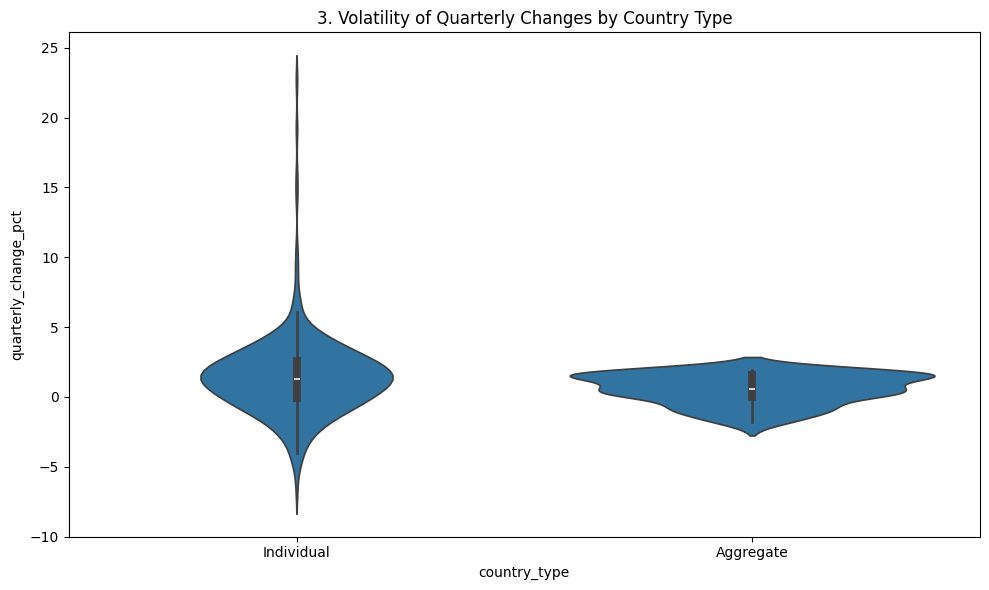

In [16]:
fig = plt.figure(figsize=(10,6))
sns.violinplot(data=df, x="country_type", y="quarterly_change_pct")
plt.title(f'{plot_no}. Volatility of Quarterly Changes by Country Type')
show_fig()
plot_no += 1


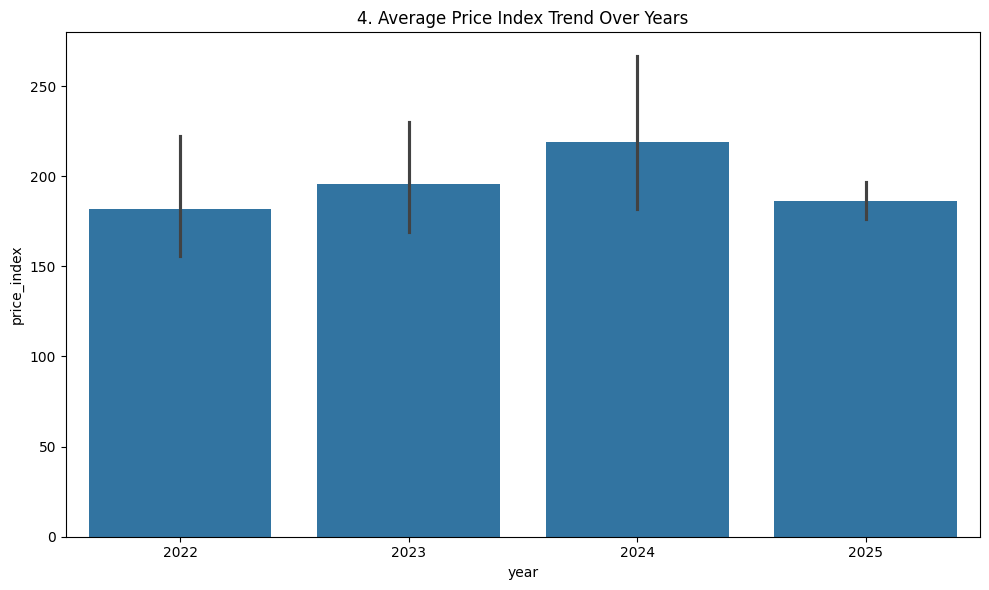

In [17]:
fig = plt.figure(figsize=(10,6))
sns.barplot(data=df, x="year", y="price_index", estimator="mean")
plt.title(f'{plot_no}. Average Price Index Trend Over Years')
show_fig()
plot_no += 1


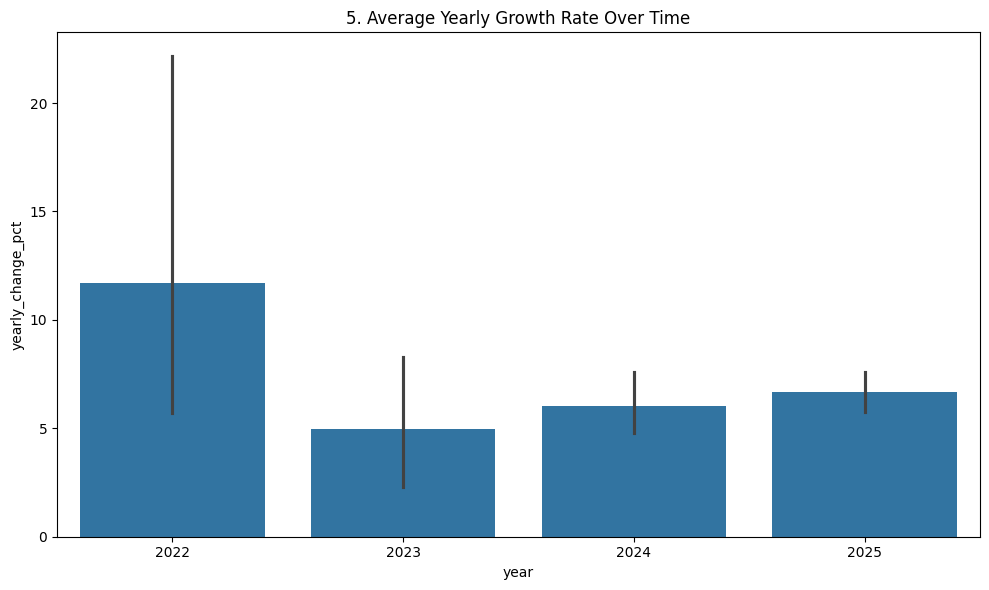

In [18]:
fig = plt.figure(figsize=(10,6))
sns.barplot(data=df, x="year", y="yearly_change_pct", estimator="mean")
plt.title(f'{plot_no}. Average Yearly Growth Rate Over Time')
show_fig()
plot_no += 1


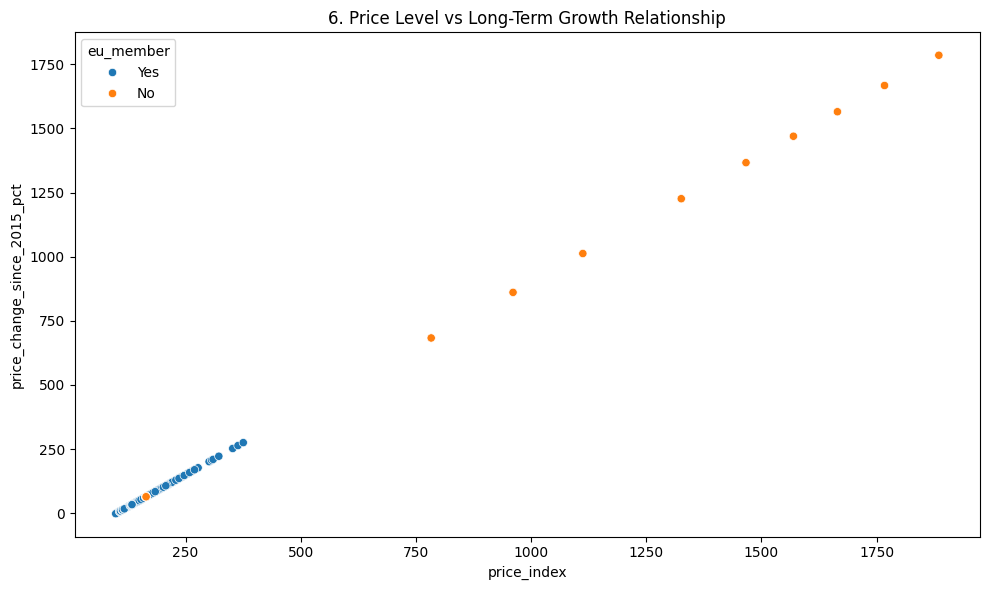

In [19]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="price_index", y="price_change_since_2015_pct", hue="eu_member")
plt.title(f'{plot_no}. Price Level vs Long-Term Growth Relationship')
show_fig()
plot_no += 1


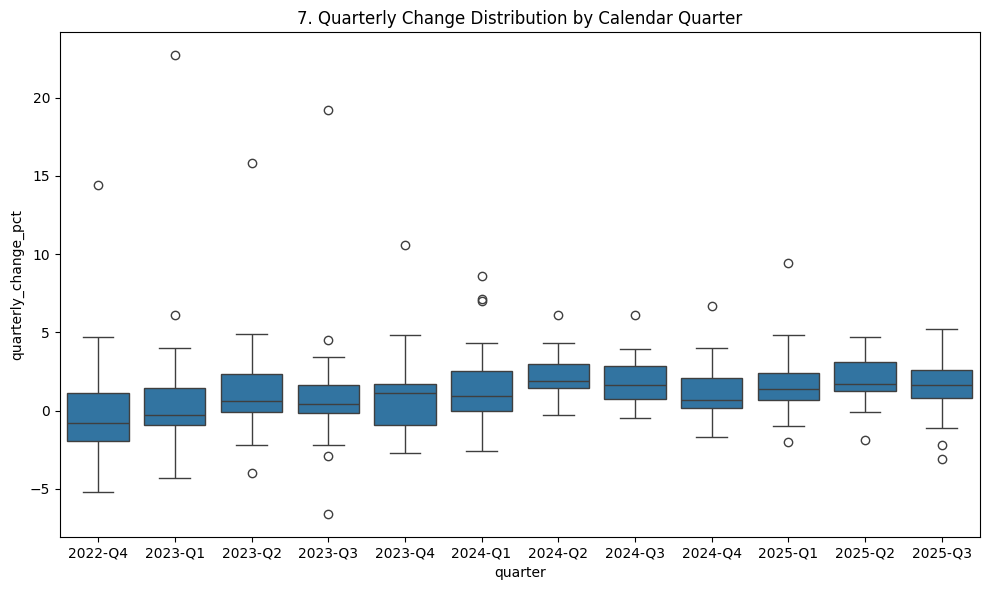

In [20]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="quarter", y="quarterly_change_pct")
plt.title(f'{plot_no}. Quarterly Change Distribution by Calendar Quarter')
show_fig()
plot_no += 1


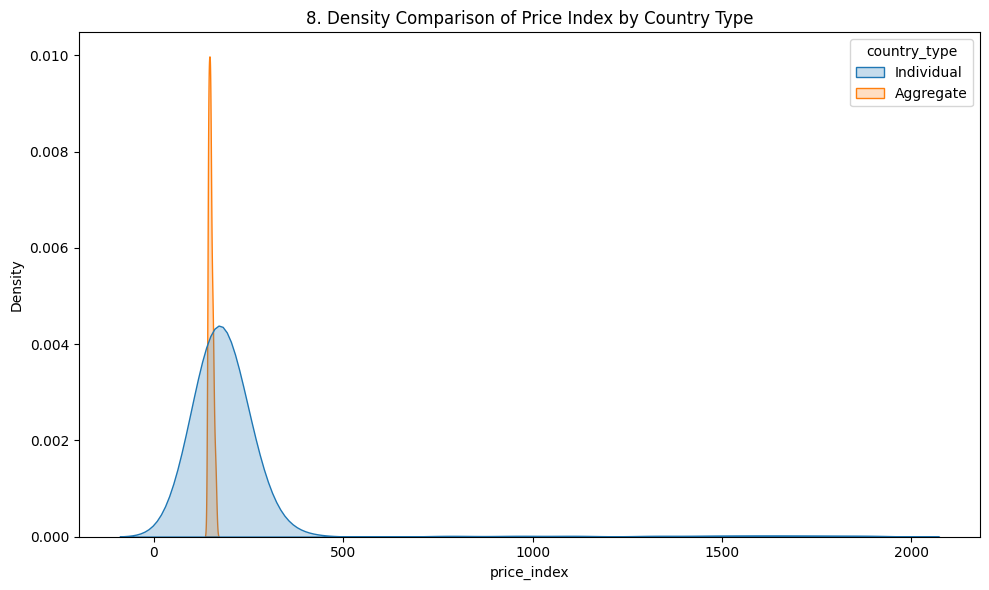

In [21]:
fig = plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x="price_index", hue="country_type", fill=True)
plt.title(f'{plot_no}. Density Comparison of Price Index by Country Type')
show_fig()
plot_no += 1


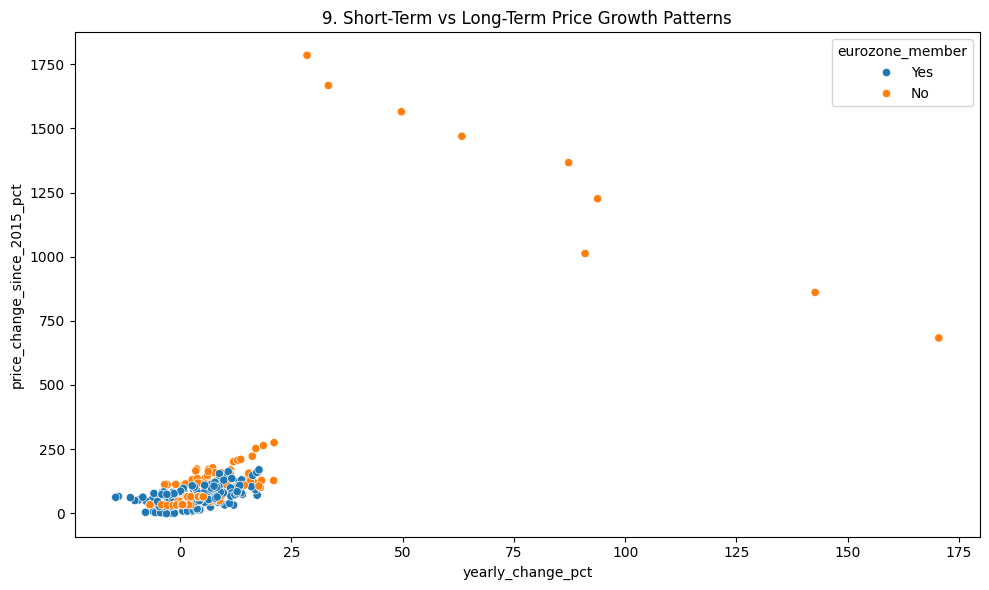

In [22]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="yearly_change_pct", y="price_change_since_2015_pct", hue="eurozone_member")
plt.title(f'{plot_no}. Short-Term vs Long-Term Price Growth Patterns')
show_fig()
plot_no += 1


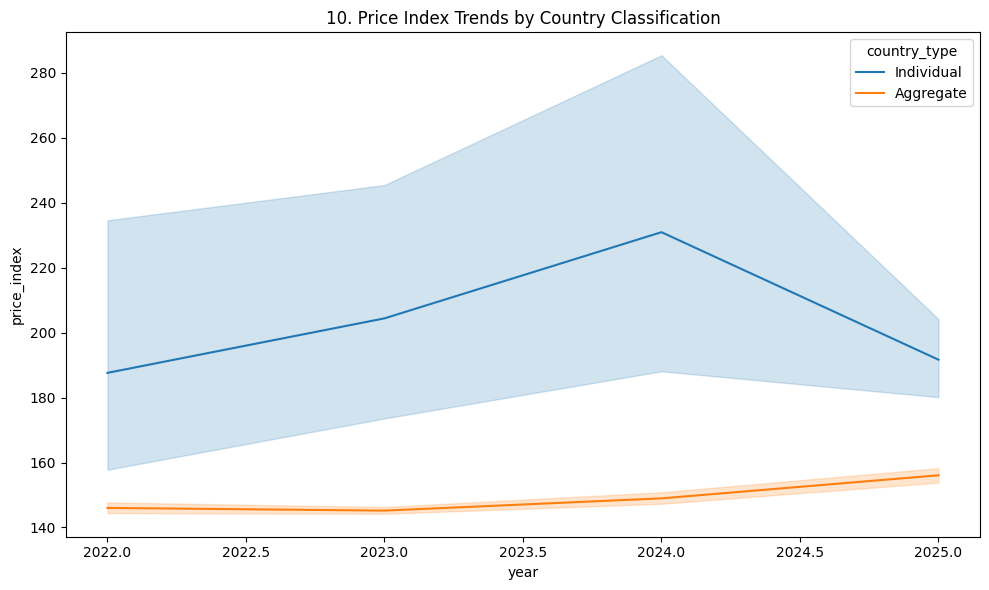

In [23]:
fig = plt.figure(figsize=(10,6))
sns.lineplot(data=df, x="year", y="price_index", hue="country_type")
plt.title(f'{plot_no}. Price Index Trends by Country Classification')
show_fig()
plot_no += 1


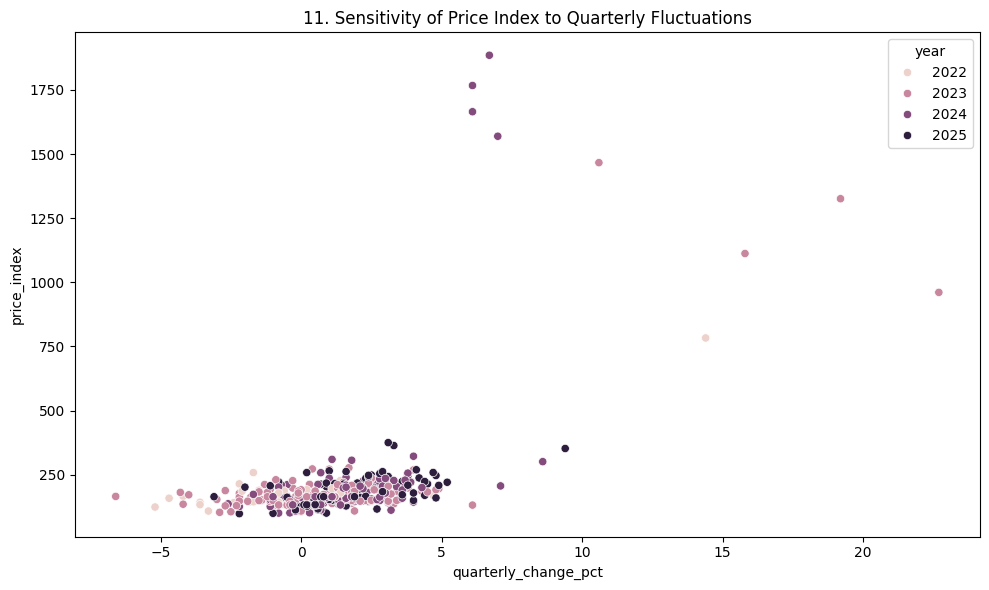

In [24]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="quarterly_change_pct", y="price_index", hue="year")
plt.title(f'{plot_no}. Sensitivity of Price Index to Quarterly Fluctuations')
show_fig()
plot_no += 1


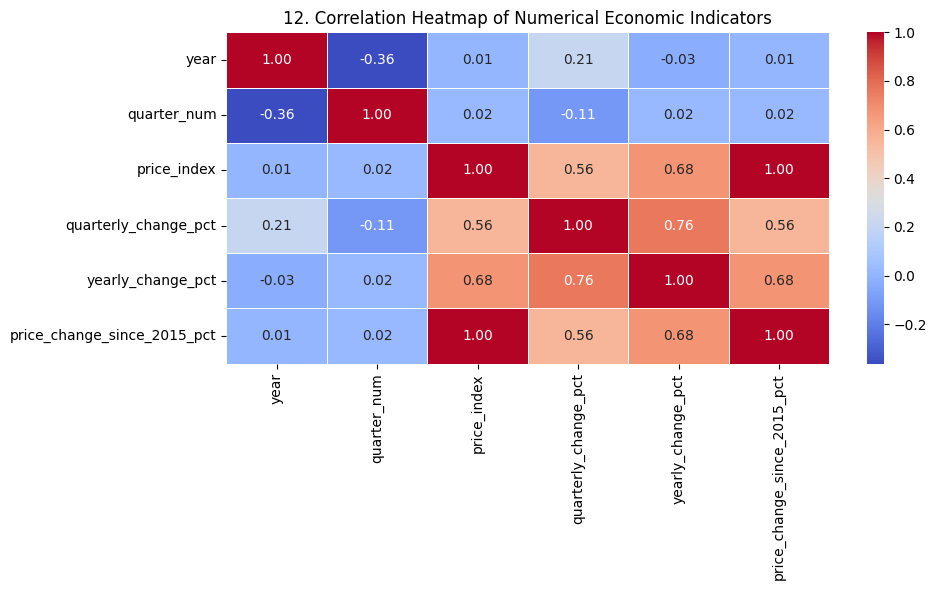

In [25]:
fig = plt.figure(figsize=(10,6))
sns.heatmap(
    df.select_dtypes(include=["int64","float64"]).corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5
)
plt.title(f'{plot_no}. Correlation Heatmap of Numerical Economic Indicators')
show_fig()
plot_no += 1

# Model Training

## Select features and target

In [26]:
X = df[[
    "year",
    "quarter_num",
    "quarterly_change_pct",
    "yearly_change_pct"
]]
y = df["price_index"]

## Split the dataset

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Create pipeline with scaling + Gradient Boosting

In [28]:
model = Pipeline([
    ("scaler", StandardScaler()),
    ("regressor", GradientBoostingRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=3,
        random_state=42
    ))
])

## Train the model

In [29]:
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor',
                 GradientBoostingRegressor(learning_rate=0.05, n_estimators=300,
                                           random_state=42))])

## Predict on test data

In [30]:
y_pred = model.predict(X_test)

## Print model accuracy (R² score)

In [31]:
accuracy = r2_score(y_test, y_pred)
print("Model R² Accuracy Score:", round(accuracy, 4))

Model R² Accuracy Score: 0.9726


## Actual vs Predicted plot

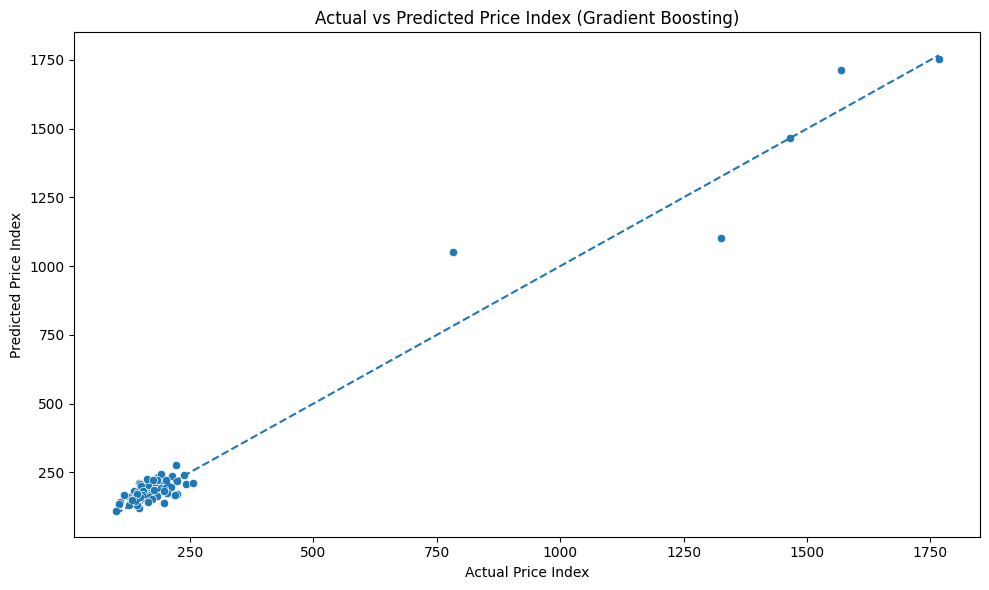

In [32]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    linestyle="--"
)
plt.title("Actual vs Predicted Price Index (Gradient Boosting)")
plt.xlabel("Actual Price Index")
plt.ylabel("Predicted Price Index")
plt.tight_layout()
plt.show()